<a href="https://colab.research.google.com/github/kanumardi/kanu_mardi/blob/master/demo/inference_for_ultralytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAHI with Ultralytics for Sliced Inference

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_ultralytics.ipynb)

## 0. Preparation

- Install latest version of SAHI and ultralytics:

In [3]:
!pip install -U torch sahi ultralytics
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.5/113.5 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   

In [4]:
#import os
#os.getcwd()

- Import required modules:

In [5]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

- Download two test images:

In [6]:
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')
download_from_url('https://ultralytics.com/images/boats.jpg', 'demo_data/obb_test_image.png')

## 1. Standard Inference with an Ultralytics Model

- Instantiate a detection model by defining model weight path and other parameters:

In [7]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path="yolo11n.pt", # any yolov8/yolov9/yolo11/yolo12/rt-detr det model is supported
    confidence_threshold=0.35,
    device="cpu", # or 'cuda:0' if GPU is available
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


- Perform prediction by feeding the `get_prediction` function with an image path and a DetectionModel instance:

In [8]:
result = get_prediction("demo_data/small-vehicles1.jpeg", detection_model)

- Or perform prediction by feeding the `get_prediction` function with a numpy image and a DetectionModel instance:

In [9]:
result = get_prediction(read_image("demo_data/small-vehicles1.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

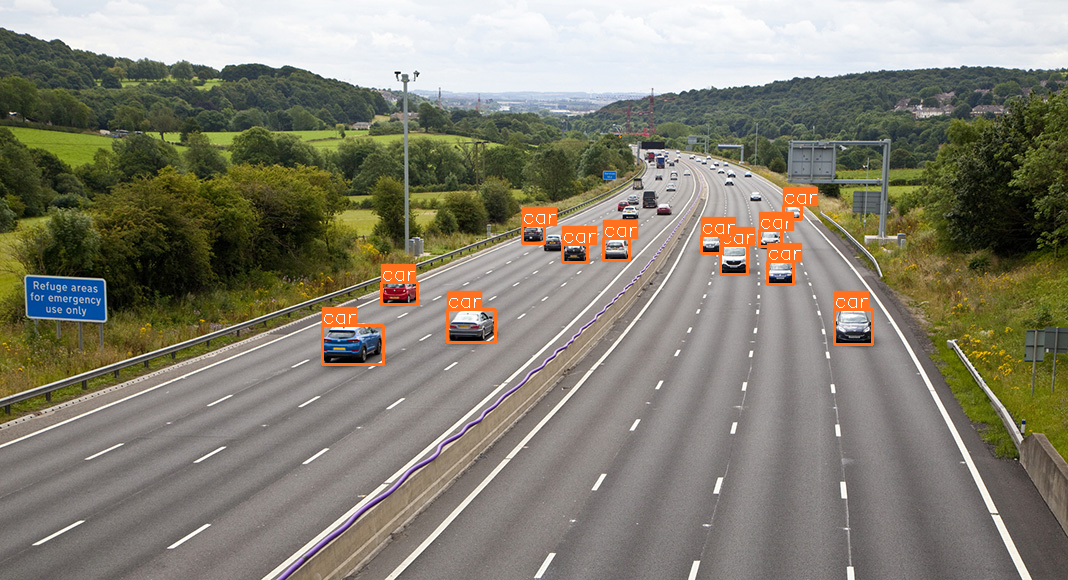

In [10]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a YOLOv8/YOLO11 Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 256x256 with an overlap ratio of 0.2:

In [11]:
result = get_sliced_prediction(
    "demo_data/small-vehicles1.jpeg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


- Visualize predicted bounding boxes and masks over the original image:

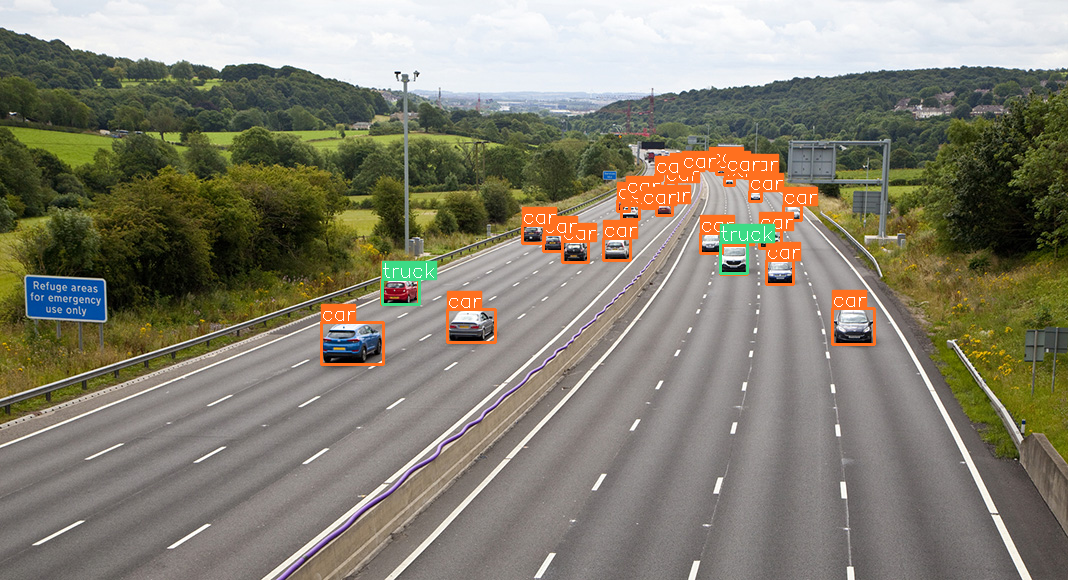

In [12]:
result.export_visuals(export_dir="demo_data/", hide_conf=True)

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [13]:
object_prediction_list = result.object_prediction_list

In [14]:
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(np.float64(447.7865905761719), np.float64(309.0754089355469), np.float64(495.3778533935547), np.float64(342.2126770019531)), w: 47.59126281738281, h: 33.13726806640625>,
    mask: None,
    score: PredictionScore: <value: 0.9220685362815857>,
    category: Category: <id: 2, name: car>>

- ObjectPrediction's can be converted to [COCO annotation](https://cocodataset.org/#format-data) format:

In [15]:
result.to_coco_annotations()[:3]

[{'image_id': None,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59126281738281,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': None,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41850280761719,
   36.02068328857422],
  'score': 0.8925947546958923,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': None,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.833130419254303,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [16]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [447.7865905761719,
   309.0754089355469,
   47.59126281738281,
   33.13726806640625],
  'score': 0.9220685362815857,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1577},
 {'image_id': 1,
  'bbox': [832.6653289794922,
   308.7012710571289,
   41.41850280761719,
   36.02068328857422],
  'score': 0.8925947546958923,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1491},
 {'image_id': 1,
  'bbox': [766.1782531738281,
   260.6600875854492,
   27.710235595703125,
   23.558876037597656],
  'score': 0.833130419254303,
  'category_id': 2,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 652}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [17]:
!pip install imantics
result.to_imantics_annotations()[:3]

  Preparing metadata (setup.py) ... done
  Created wheel for imantics: filename=imantics-0.1.12-py3-none-any.whl size=16009 sha256=e640aca60728ed5577f479a2e8aeb43179ccce12811c68a1cfeccd4983b15ba5
  Stored in directory: /root/.cache/pip/wheels/8c/7e/91/8fba0377906bcb6bf32ce48286924f37bb453a1761ffcf44e1
Successfully built imantics


- ObjectPrediction's can be converted to [fiftyone](https://github.com/voxel51/fiftyone) detection format:

In [18]:
!pip install fiftyone
result.to_fiftyone_detections()[:3]

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.6/307.6 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.3/943.3 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 15.1 MB/s eta 

[<Detection: {
     'id': '689a330d78db78c70cc442f9',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.4192758338728201,
         0.5328886360957705,
         0.044561107506912744,
         0.057133220804148704,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.9220685362815857,
     'index': None,
 }>,
 <Detection: {
     'id': '689a330d78db78c70cc442fa',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7796491844377268,
         0.5322435707881533,
         0.03878136967005354,
         0.06210462635961072,
     ],
     'mask': None,
     'mask_path': None,
     'confidence': 0.8925947546958923,
     'index': None,
 }>,
 <Detection: {
     'id': '689a330d78db78c70cc442fb',
     'attributes': {},
     'tags': [],
     'label': 'car',
     'bounding_box': [
         0.7173953681402885,
         0.44941394411284347,
         0.025945913479122777,
         0.04061875178896147

## 4. Batch Prediction

- Set model and directory parameters:

In [1]:
model_type = "ultralytics"
model_path = 'yolo11n.pt'
model_device = "cpu" # or 'cuda:0' if GPU is available
model_confidence_threshold = 0.4

slice_height = 256
slice_width = 256
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

- Perform sliced inference on given folder:

In [5]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:03<00:09,  3.03s/it]

Prediction time is: 2954.51 ms
Performing prediction on 60 slices.


Performing inference on images:  50%|█████     | 2/4 [00:16<00:18,  9.06s/it]

Prediction time is: 13146.60 ms
Performing prediction on 15 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:19<00:06,  6.29s/it]

Prediction time is: 2915.38 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|██████████| 4/4 [00:24<00:00,  6.09s/it]

Prediction time is: 4982.62 ms
Prediction results are successfully exported to runs/predict/exp2


# 5 Sliced Segmentation

Run the same steps for YOLO11 segmentation model:

In [6]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")

NameError: name 'AutoDetectionModel' is not defined

- Perform standard segmentation:

In [ ]:
result = get_prediction(im, detection_model_seg)

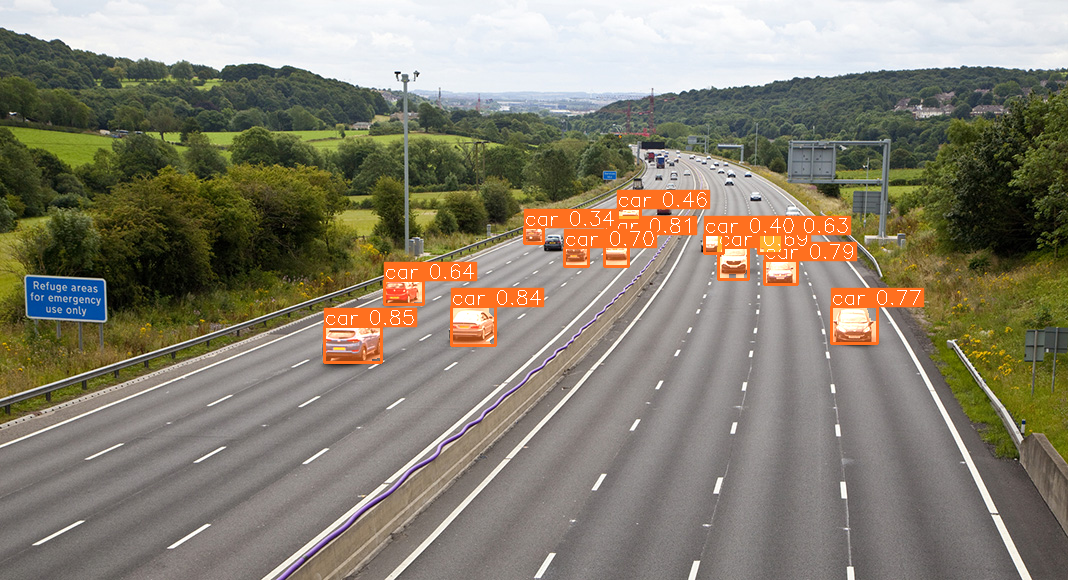

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

- Repeat for sliced segmentation:

In [ ]:
result = get_sliced_prediction(
    im,
    detection_model_seg,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

Performing prediction on 15 slices.


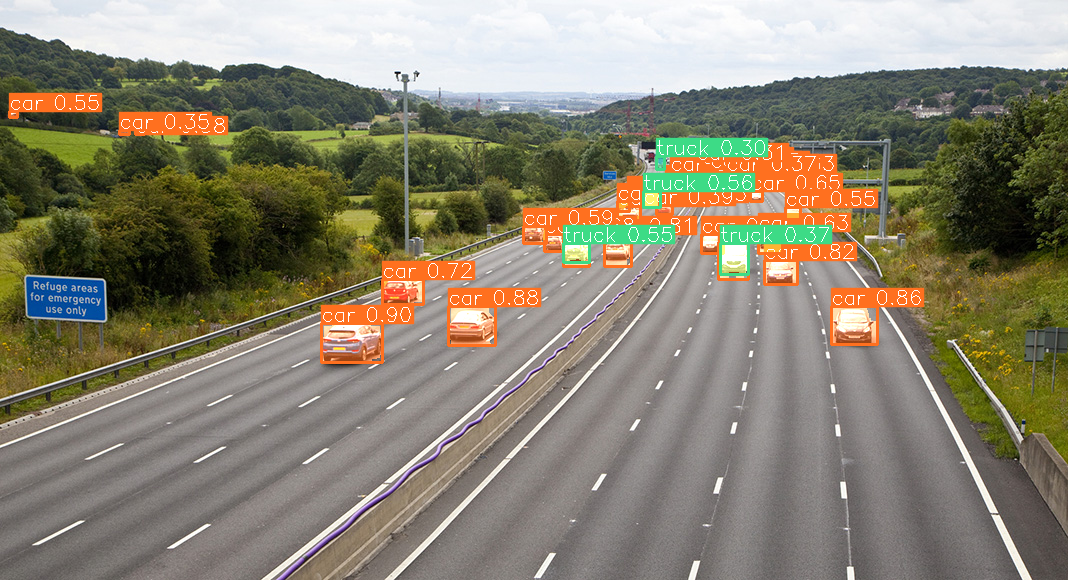

In [ ]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

Sliced predictions are much better!

- Observe the prediction format:

In [ ]:
object_prediction_list = result.object_prediction_list
object_prediction_list[0]

ObjectPrediction<
    bbox: BoundingBox: <(833, 309, 873, 343), w: 40, h: 34>,
    mask: <sahi.annotation.Mask object>,
    score: PredictionScore: <value: 0.9211080074310303>,
    category: Category: <id: 2, name: car>>

In [ ]:
object_prediction_list[0].mask.segmentation

[[837,
  313,
  836,
  313,
  836,
  315,
  835,
  316,
  835,
  317,
  835,
  318,
  834,
  319,
  833,
  320,
  833,
  336,
  834,
  337,
  834,
  338,
  834,
  339,
  835,
  340,
  835,
  341,
  836,
  342,
  837,
  342,
  841,
  342,
  846,
  342,
  863,
  342,
  864,
  343,
  869,
  343,
  870,
  343,
  871,
  342,
  871,
  340,
  872,
  340,
  872,
  339,
  873,
  338,
  873,
  323,
  873,
  321,
  873,
  320,
  872,
  319,
  872,
  318,
  871,
  318,
  866,
  313,
  867,
  312,
  865,
  310,
  863,
  310,
  862,
  309,
  841,
  309,
  840,
  309,
  839,
  310,
  839,
  311,
  838,
  311,
  838,
  312]]

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


Performing inference on images:   0%|                                                | 0/3 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  33%|█████████████▎                          | 1/3 [00:01<00:03,  1.74s/it]

Prediction time is: 1615.49 ms
Performing prediction on 15 slices.


Performing inference on images:  67%|██████████████████████████▋             | 2/3 [00:03<00:01,  1.70s/it]

Prediction time is: 1593.49 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|████████████████████████████████████████| 3/3 [00:05<00:00,  1.86s/it]

Prediction time is: 2070.87 ms
Prediction results are successfully exported to runs/predict/exp9


# 7 Sliced OBB Prediction


In [ ]:
detection_model_obb = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-obb.pt', # any yolov8/yolov9/yolo11/yolo12 obb model is supported
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/obb_test_image.png")


In [ ]:
result = get_sliced_prediction(
    im,
    detection_model_obb,
    slice_height = 512,
    slice_width = 512,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
    #perform_standard_pred = False
)

Performing prediction on 15 slices.


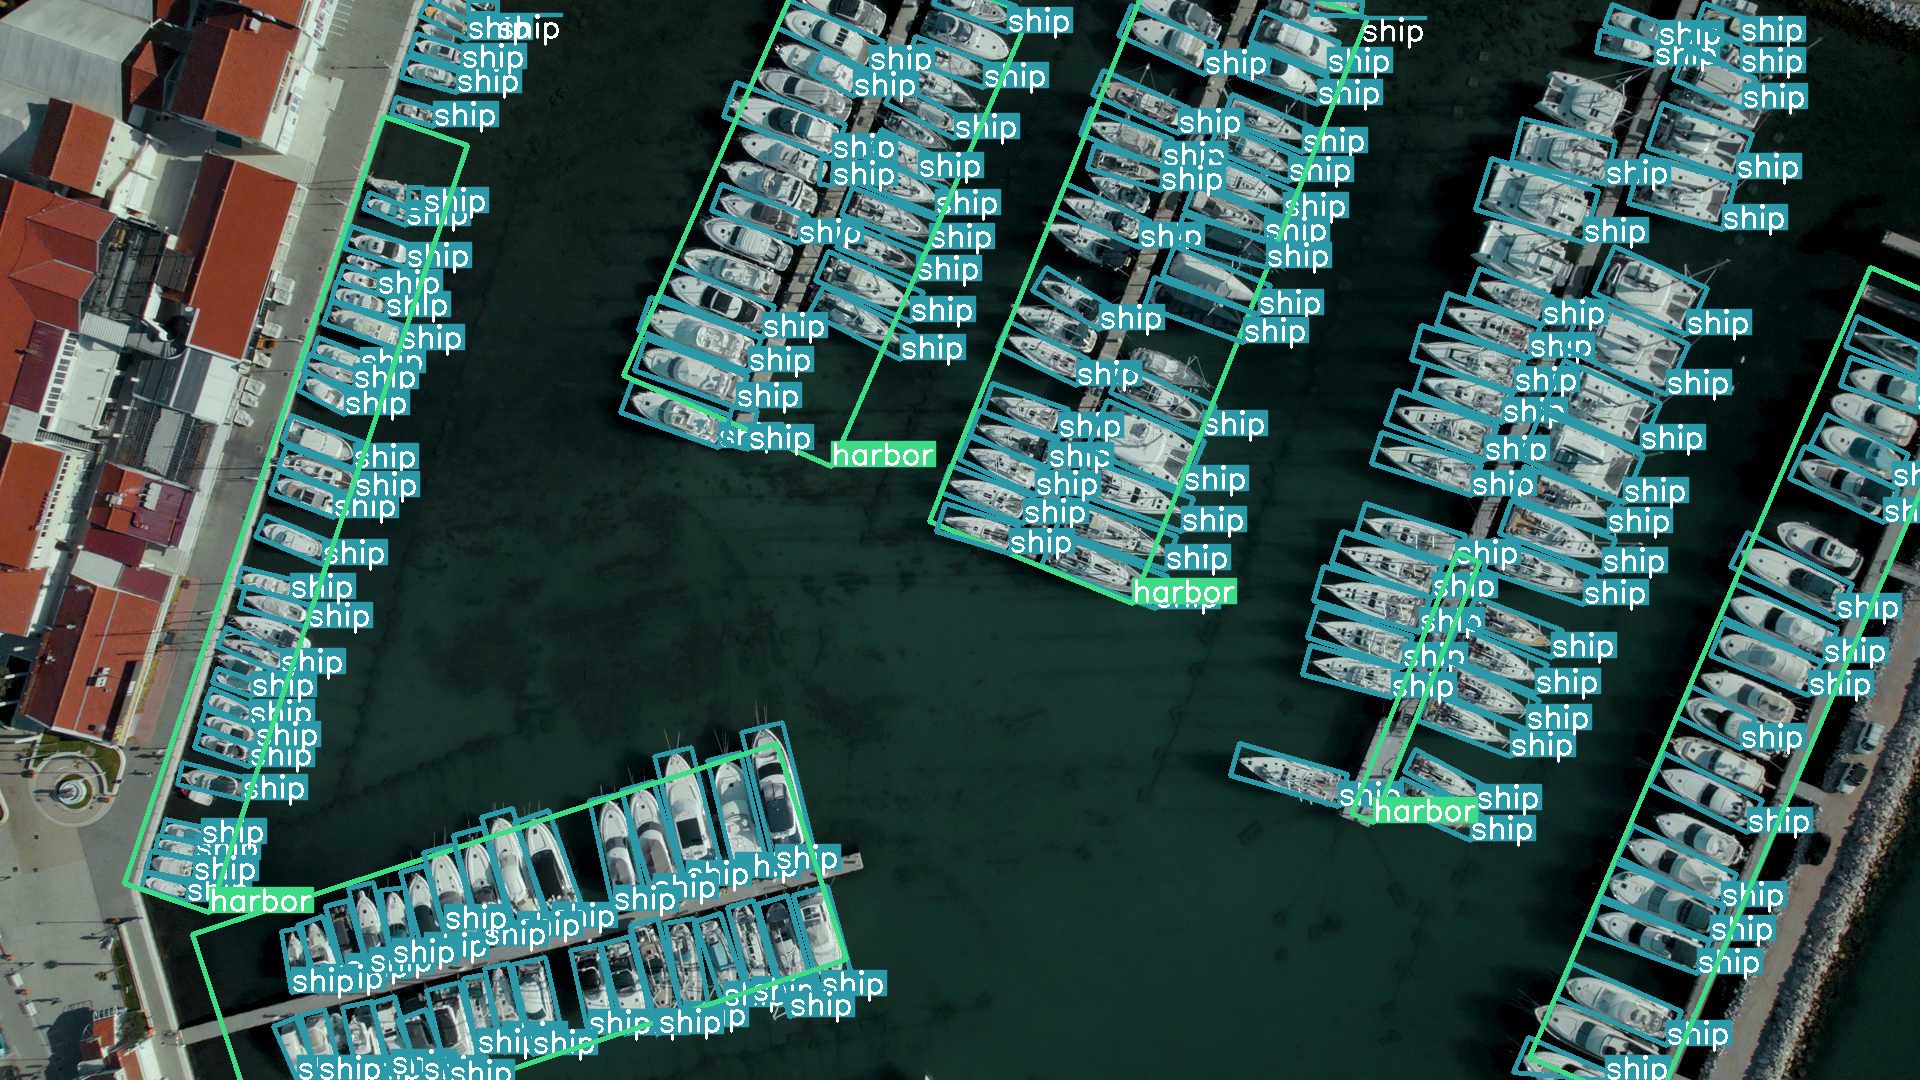

In [ ]:
result.export_visuals(export_dir="demo_data/", text_size=1, rect_th=3, hide_conf=True)

Image("demo_data/prediction_visual.png", width=800)

In [3]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

NameError: name 'predict' is not defined

In [4]:
from sahi.predict import predict

predict(
    model_type=model_type,
    model_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 4 listed files in folder: demo_data/


Performing inference on images:   0%|          | 0/4 [00:00<?, ?it/s]

Performing prediction on 15 slices.


Performing inference on images:  25%|██▌       | 1/4 [00:05<00:16,  5.44s/it]

Prediction time is: 5351.57 ms
Performing prediction on 60 slices.


Performing inference on images:  50%|█████     | 2/4 [00:18<00:19,  9.94s/it]

Prediction time is: 12940.79 ms
Performing prediction on 15 slices.


Performing inference on images:  75%|███████▌  | 3/4 [00:21<00:06,  6.82s/it]

Prediction time is: 3037.89 ms
Performing prediction on 20 slices.


Performing inference on images: 100%|██████████| 4/4 [00:26<00:00,  6.56s/it]

Prediction time is: 4511.51 ms
Prediction results are successfully exported to runs/predict/exp


In [7]:
detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")

NameError: name 'AutoDetectionModel' is not defined

In [9]:
from sahi import AutoDetectionModel
from sahi.utils.cv import read_image

detection_model_seg = AutoDetectionModel.from_pretrained(
    model_type='ultralytics',
    model_path='yolo11n-seg.pt', # any yolov8/yolov9/yolo11/yolo12 seg model is supported
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0' if GPU is available
)

im = read_image("demo_data/small-vehicles1.jpeg")